In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    #Factor=2841.438
    Factor=1
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/(Factor**2*error[i]*error[i])
        sum_sigma += 1/(Factor**2*error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method
#def Get_ratio_error(value1,error1,valuem,errorm):
#    return abs(value1-valuem)/valuem,abs(value1-valuem)/valuem*math.sqrt((error1/value1)**2+(errorm/valuem)**2)
def Get_ratio_error(value1,error1,valuem,errorm):
    return abs(value1-valuem)/value1,abs(value1-valuem)/value1*math.sqrt((error1/value1)**2+(errorm/valuem)**2)

In [3]:
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('analysis/Unpol/Unpol.txt',delim_whitespace=True)
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('analysis/Unpol/Unpol_1xs.txt',delim_whitespace=True)
df_xs_kT8_zQ2xbjPhT = pd.read_csv('analysis/Unpol/Unpol_1xs_lowQ2_xnew.txt',delim_whitespace=True)
#df_xs_kT8_zQ2xbjPhT = pd.read_csv('analysis/Unpol/Unpol_1xs_notlowQ2x.txt',delim_whitespace=True)

#df_xs_kT8_zQ2xbjPhT = pd.read_csv('analysis/Unpol/Unpol_1xs_notlowQ2x.txt',delim_whitespace=True)
df_xs_kT8_zQ2xbjPhT.head()

,set,Ebeam,beam_P,Target_P,x,y,z,pT2,phih,phis,...,amm,nrad_ir,rad_f,rad_f_err,nrad,nrad_err,rad,rad_err,nrad_rad,nrad_rad_err
0,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.984513,1.0,...,-2.401540e-13,0.000094,5.649154e-08,7.235365e-12,0.000094,7.235365e-12,0.000043,6.550193e-08,0.000137,6.550917e-08
1,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.670354,1.0,...,-2.401540e-13,0.000094,5.077853e-08,6.432517e-12,0.000094,6.432517e-12,0.000042,6.487160e-08,0.000136,6.487803e-08
2,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.356194,1.0,...,-2.401540e-13,0.000094,4.017271e-08,5.619035e-12,0.000094,5.619035e-12,0.000041,5.859166e-08,0.000135,5.859728e-08
3,0,11.0,U,U,0.125,0.48445,0.35,0.1,-2.042035,1.0,...,-2.401540e-13,0.000094,2.610857e-08,3.604514e-12,0.000094,3.604514e-12,0.000040,5.340379e-08,0.000134,5.340740e-08
4,0,11.0,U,U,0.125,0.48445,0.35,0.1,-1.727876,1.0,...,-2.401540e-13,0.000094,1.031505e-08,2.931593e-12,0.000094,2.931593e-12,0.000039,4.509696e-08,0.000133,4.509990e-08


In [4]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
#Q2_cuts=[3,4,5,6]
#Q2_cuts=[3,4,5,6,8]
xbj_cuts=[0,0.25]
#xbj_cuts=[0.25,0.4]
#xbj_cuts=[0.4,0.6]
#PhT_cuts = [0,0.2]
PhT_cuts = [0,0.2]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
#phih_bins =[-PI,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.8*PI,-0.6*PI,-0.4*PI,-0.15*PI,0,0.15*PI,0.4*PI,0.6*PI,0.8*PI,PI]
phih_bins =[-PI,-0.6*PI,-0.4*PI,-0.2*PI,0,0.2*PI,0.4*PI,0.6*PI,0.8*PI,PI]
#df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['Ebeam']==8.8)&(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1])]
#df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[(df_xs_kT6_zQ2xbjPhT['Ebeam']==8.8)&(df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0])&(df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1])]
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0])&(df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1])&(df_xs_kT8_zQ2xbjPhT['pT2']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT2']<PhT_cuts[1])]


3.141592653589793


In [5]:
def Get_x_cuts_from_Q2(Q2l,Q2r):
    #from Q2vs. x phase plots
    if Q2l==1 and Q2r==1.5:
        return [0,0.25]
    elif Q2l==1.5 and Q2r==2:
        return [0.08,0.25,0.32]
    elif Q2l==2 and Q2r==2.5:
        return [0.1,0.25,0.35]
    elif Q2l==2.5 and Q2r==3:
        return [0.15,0.25,0.4]
    elif Q2l==3 and Q2r==4:
        return [0.2,0.4,0.5]
    elif Q2l==4 and Q2r==5:
        return [0.25,0.4,0.55]
    elif Q2l==5 and Q2r==6:
        return [0.375,0.4,0.6]
    elif Q2l==6:
        return [0.4,0.7]

0 0
0.3 0.4
1 1.5
20 20
0.3 0.4
1.5 2
20 20
0.3 0.4
2 2.5
0 0
0.3 0.4
2.5 3
0 0
0.4 0.5
1 1.5
20 20
0.4 0.5
1.5 2
20 20
0.4 0.5
2 2.5
0 0
0.4 0.5
2.5 3
0 0
0.5 0.6
1 1.5
20 20
0.5 0.6
1.5 2
20 20
0.5 0.6
2 2.5
0 0
0.5 0.6
2.5 3


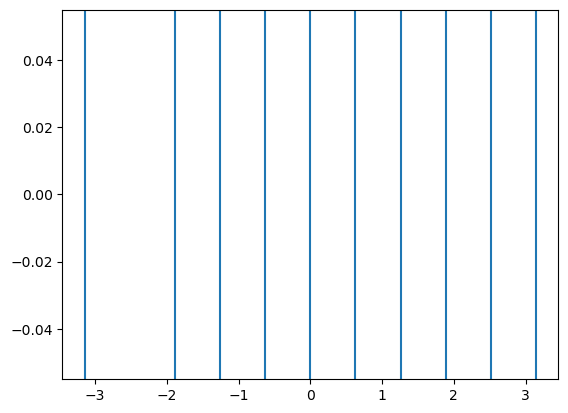

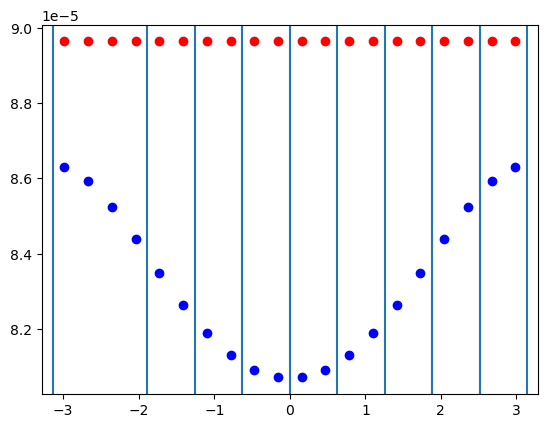

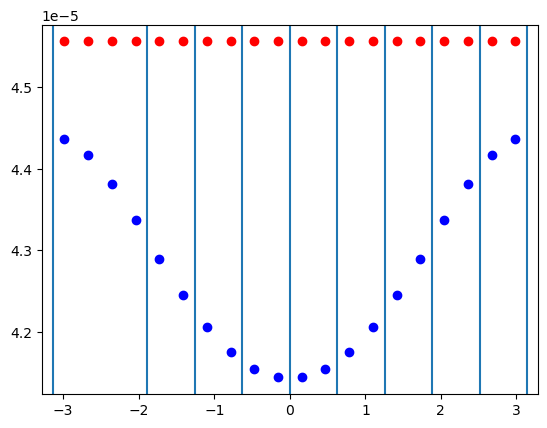

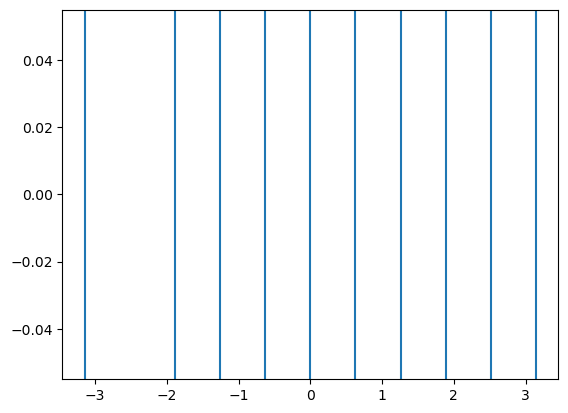

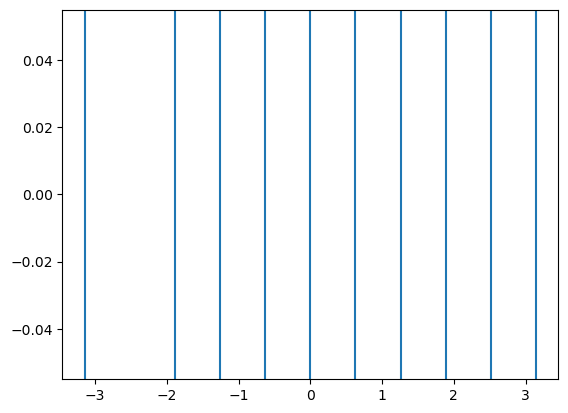

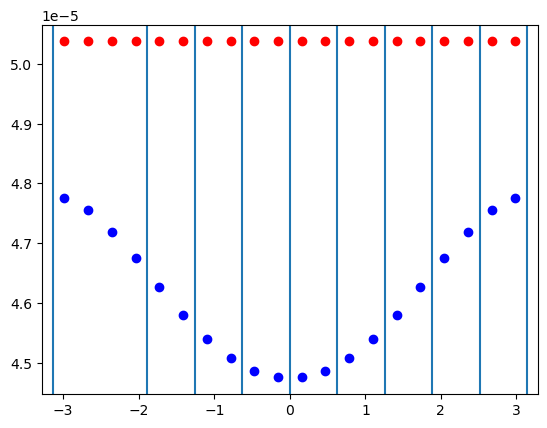

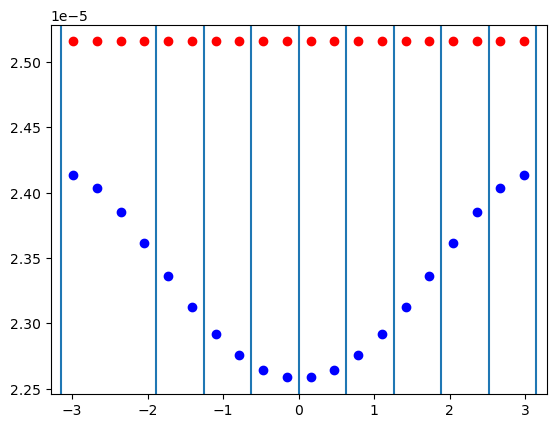

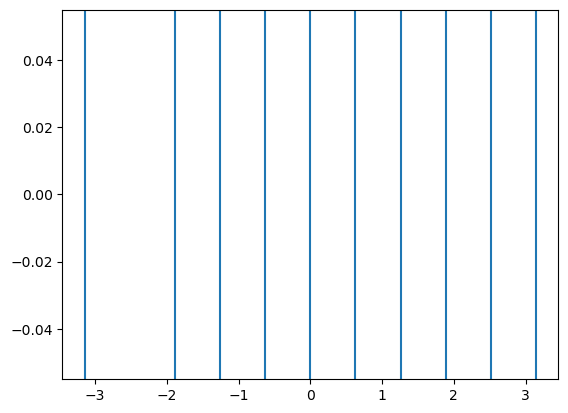

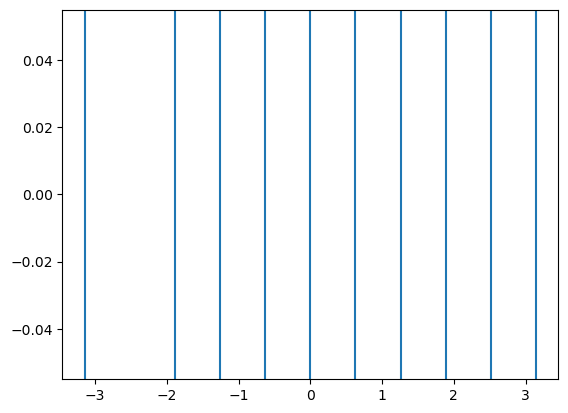

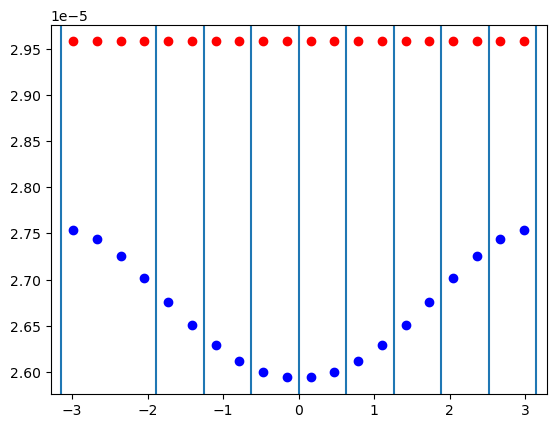

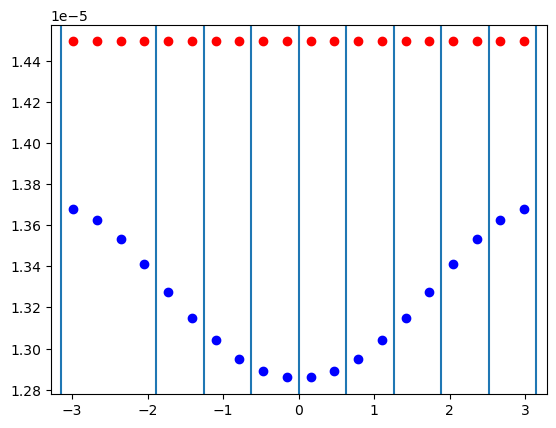

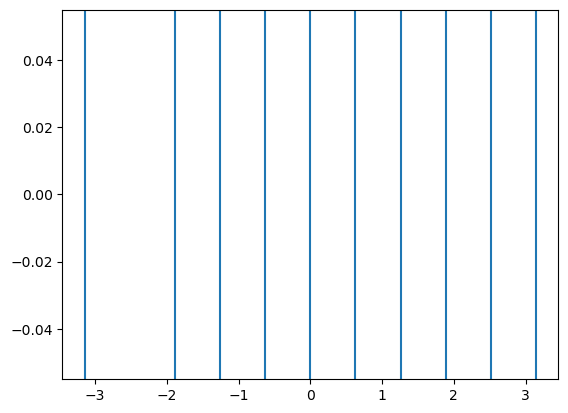

In [6]:
xbj=(xbj_cuts[0]+xbj_cuts[1])/2
s=2*11*0.93827
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
        if Q2_cuts[i_Q2-1]==2.5:
            yl=Q2_cuts[i_Q2-1]/s/0.225
            yr=Q2_cuts[i_Q2]/s/0.225
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['born'].to_list()
        phih_kT6 = df_xs_kT8['phih'].to_list()
        Fuu_kT6 = df_xs_kT8['nrad_rad'].to_list()
        #print(df_xs_kT8)
        print(len(phih_kT8),len(phih_kT6))
        print(z_cuts[i_z-1],z_cuts[i_z])
        #plt.text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]))
        print(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        plt.plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        for i_phih in phih_bins:
            plt.axvline(x=i_phih)

[0, 0.25] 0.125
0 0
[0.08, 0.25, 0.32] 0.165
0 0
[0.1, 0.25, 0.35] 0.175
0 0
[0.15, 0.25, 0.4] 0.2
0 0
[0, 0.25] 0.125
0 0
[0.08, 0.25, 0.32] 0.165
0 0
[0.1, 0.25, 0.35] 0.175
0 0
[0.15, 0.25, 0.4] 0.2
0 0
[0, 0.25] 0.125
0 0
[0.08, 0.25, 0.32] 0.165
0 0
[0.1, 0.25, 0.35] 0.175
0 0
[0.15, 0.25, 0.4] 0.2
0 0


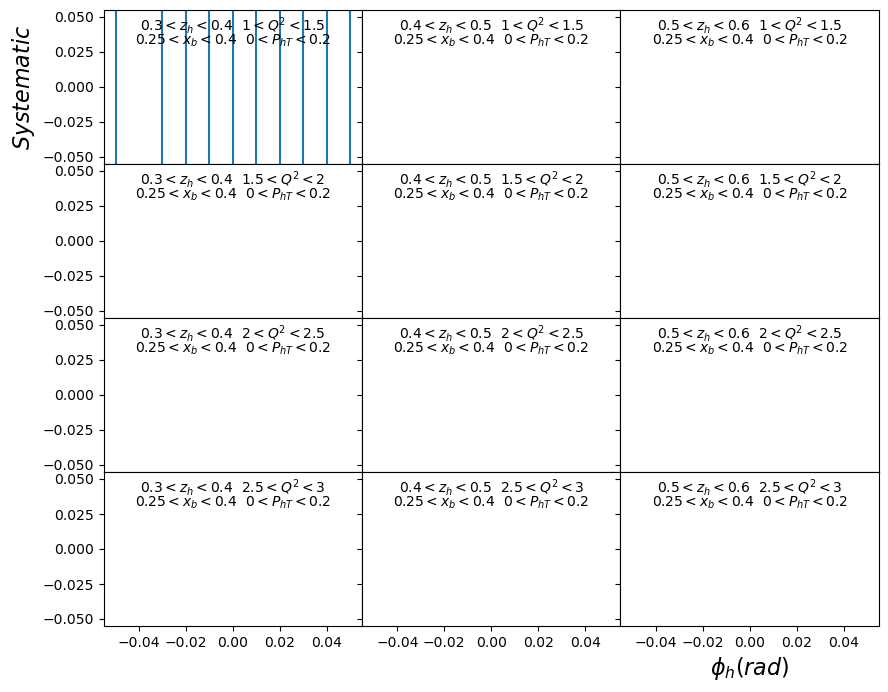

In [7]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
f=open('../Unpol_proposal/Materials/results_sys/sys.txt','w')
print("zl zr Q2l Q2r phihl phihr phih dFuu dFuu_err",file=f)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
       
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8_zQ2['x']==xbj)]

        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['born'].to_list()
        phih_kT6 = df_xs_kT8['phih'].to_list()
        Fuu_kT6 = df_xs_kT8['nrad_rad'].to_list()
        #print(df_xs_kT8)
        print(len(phih_kT8),len(phih_kT6))
        axs[i_Q2-1][i_z-1].plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        axs[i_Q2-1][i_z-1].plot(phih_kT6,np.asarray(Fuu_kT6),'bo')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
        
axs[0][0].set_ylabel('$Systematic$',fontsize=16)
for i_phih in phih_bins:
    axs[0][0].axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/results_sys/RC.pdf')
f.close()

40 40
20 20
0 0
0 0
40 40
20 20
0 0
0 0
40 40
20 20
0 0
0 0


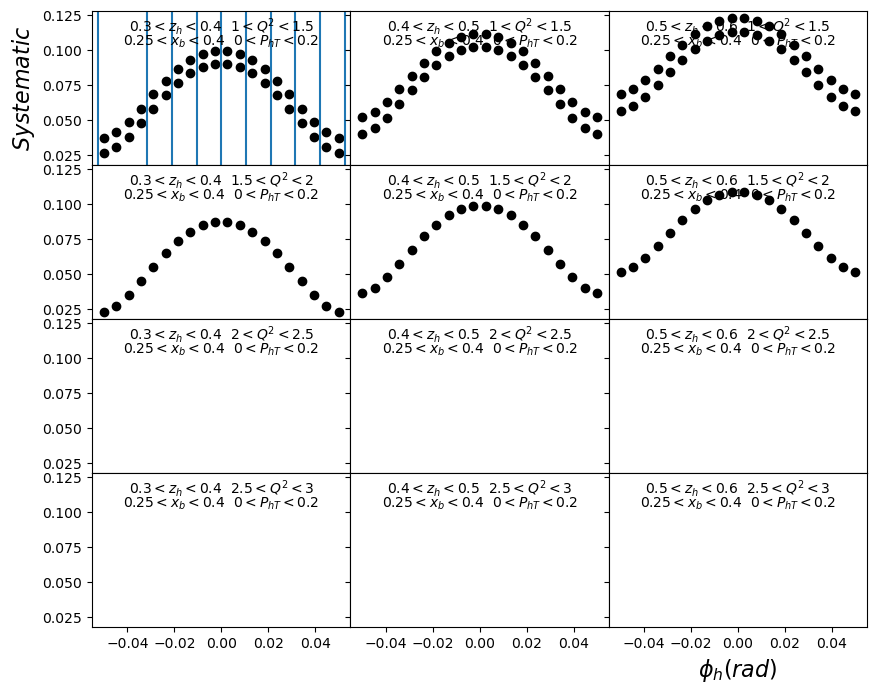

In [8]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)
f=open('../Unpol_proposal/Materials/results_sys/sys.txt','w')
print("zl zr Q2l Q2r phihl phihr phih dFuu dFuu_err",file=f)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)]

        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['born'].to_list()
        phih_kT6 = df_xs_kT8['phih'].to_list()
        Fuu_kT6 = df_xs_kT8['nrad_rad'].to_list()
        #print(df_xs_kT8)
        print(len(phih_kT8),len(phih_kT6))
        
        axs[i_Q2-1][i_z-1].plot(phih_kT6,abs(np.asarray(Fuu_kT6)-np.asarray(Fuu_kT8))/np.asarray(Fuu_kT8),'ko')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
axs[0][0].set_ylabel('$Systematic$',fontsize=16)
for i_phih in phih_bins:
    axs[0][0].axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/results_sys/RC_ratio_abs.pdf')
f.close()

In [9]:
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[(df_xs_kT8_zQ2xbjPhT['pT2']>PhT_cuts[0])&(df_xs_kT8_zQ2xbjPhT['pT2']<PhT_cuts[1])]
print(df_xs_kT8_zQ2['x'].unique())

[0.125 0.165 0.285 0.175 0.3   0.2   0.325]


[0, 0.25] 0.125
20 20
[0.08, 0.25, 0.32] 0.165
20 20
[0.1, 0.25, 0.35] 0.175
20 20
[0, 0.25] 0.125
20 20
[0.08, 0.25, 0.32] 0.165
20 20
[0.1, 0.25, 0.35] 0.175
20 20
[0, 0.25] 0.125
20 20
[0.08, 0.25, 0.32] 0.165
20 20
[0.1, 0.25, 0.35] 0.175
20 20


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_56100/1846224928.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_lastQ2=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8_zQ2xbjPhT['x']==xbj)]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_56100/1846224928.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_lastQ2=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8_zQ2xbjPhT['x']==xbj)]
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_56100/1846224928.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_lastQ2=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8

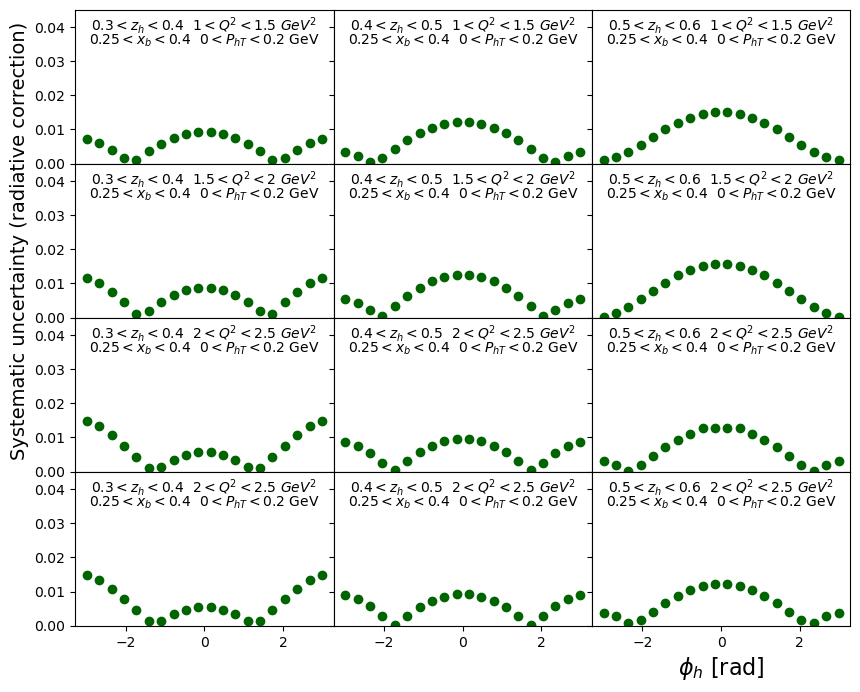

In [10]:
Factor=0.25
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h$ [rad]',fontsize=16)
f=open('../Unpol_proposal/Materials/results_sys/sys.txt','w')
print("zl zr Q2l Q2r phihl phihr phih dFuu dFuu_err",file=f)

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)-1):
        x_cuts=Get_x_cuts_from_Q2(Q2_cuts[i_Q2-1],Q2_cuts[i_Q2])
        xbj=(x_cuts[0]+x_cuts[1])/2
        print(x_cuts,xbj)
        yl=Q2_cuts[i_Q2-1]/s/xbj
        yr=Q2_cuts[i_Q2]/s/xbj
        
        df_xs_kT8=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8_zQ2['x']==xbj)]
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['born'].to_list()
        phih_kT6 = df_xs_kT8['phih'].to_list()
        Fuu_kT6 = df_xs_kT8['nrad_rad'].to_list()
        #print(df_xs_kT8)
        print(len(phih_kT8),len(phih_kT6))
        
        axs[i_Q2-1][i_z-1].plot(phih_kT6,Factor*abs(np.asarray(Fuu_kT6)-np.asarray(Fuu_kT8))/np.asarray(Fuu_kT8),'o',color='darkgreen')
        axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
        axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)      
        #axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.12)
    xbj=0.2
    yl=Q2_cuts[len(Q2_cuts)-2]/s/xbj
    yr=Q2_cuts[len(Q2_cuts)-1]/s/xbj
    df_xs_kT8_lastQ2=df_xs_kT8_zQ2[(df_xs_kT8_zQ2['z']>z_cuts[i_z-1])&(df_xs_kT8_zQ2['z']<z_cuts[i_z])&(df_xs_kT8_zQ2['y']>yl)&(df_xs_kT8_zQ2['y']<yr)&(df_xs_kT8_zQ2xbjPhT['x']==xbj)]
    phih_kT8 = df_xs_kT8_lastQ2['phih'].to_list()
    Fuu_kT8 = df_xs_kT8_lastQ2['born'].to_list()
    phih_kT6 = df_xs_kT8_lastQ2['phih'].to_list()
    Fuu_kT6 = df_xs_kT8_lastQ2['nrad_rad'].to_list()
    axs[len(Q2_cuts)-2][i_z-1].plot(phih_kT6,Factor*abs(np.asarray(Fuu_kT6)-np.asarray(Fuu_kT8))/np.asarray(Fuu_kT8),'o',color='darkgreen')
    axs[len(Q2_cuts)-2][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$ $GeV^2$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[len(Q2_cuts)-2][i_z-1].transAxes)
    axs[len(Q2_cuts)-2][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$ GeV'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[len(Q2_cuts)-2][i_z-1].transAxes)      
axs[0][0].set_ylim(0,0.045)
axs[1][0].set_ylabel('Systematic uncertainty (radiative correction)',fontsize=14)
#for i_phih in phih_bins:
#    axs[0][0].axvline(x=i_phih)
plt.savefig('../Unpol_proposal/Materials/results_sys/RC_ratio_abs.pdf')
f.close()